In [1]:
from google.colab import files
uploaded = files.upload()

Saving cleaned_medical_insurance.csv to cleaned_medical_insurance.csv


In [2]:
import io
for filename in uploaded.keys():
    print(f"File '{filename}' uploaded successfully!")
    # Store the file name to use in the next step
    csv_file_name = filename

File 'cleaned_medical_insurance.csv' uploaded successfully!


In [3]:
import pandas as pd
import numpy as np

In [4]:
file_name = 'cleaned_medical_insurance.csv'

In [5]:
try:
    df = pd.read_csv(file_name)
    print("Data loaded successfully!")
except FileNotFoundError:
    print(f"Error: The file '{file_name}' was not found. Please check the file name.")

Data loaded successfully!


In [6]:
print("\n--- Initial Data Inspection (First 5 Rows) ---")
display(df.head())


--- Initial Data Inspection (First 5 Rows) ---


,Unnamed: 0,age,sex,region,urban_rural,income,education,marital_status,employment_status,household_size,...,liver_disease,arthritis,mental_health,proc_imaging_count,proc_surgery_count,proc_physio_count,proc_consult_count,proc_lab_count,is_high_risk,had_major_procedure
0,0,52,Female,North,Suburban,22700,Doctorate,Married,Retired,3,...,0,1,0,1,0,2,0,1,0,0
1,1,79,Female,North,Urban,12800,No HS,Married,Employed,3,...,0,1,1,0,0,1,0,1,1,0
2,2,68,Male,North,Rural,40700,HS,Married,Retired,5,...,0,0,1,1,0,2,1,0,1,0
3,3,15,Male,North,Suburban,15600,Some College,Married,Self-employed,5,...,0,0,0,1,0,0,1,0,0,0
4,4,53,Male,Central,Suburban,89600,Doctorate,Married,Self-employed,2,...,0,1,0,2,0,1,1,0,1,0


In [8]:
print("\n--- Data Structure (Info) ---")
df.info()


--- Data Structure (Info) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 54 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   100000 non-null  int64  
 1   age                          100000 non-null  int64  
 2   sex                          100000 non-null  object 
 3   region                       100000 non-null  object 
 4   urban_rural                  100000 non-null  object 
 5   income                       100000 non-null  int64  
 6   education                    100000 non-null  object 
 7   marital_status               100000 non-null  object 
 8   employment_status            100000 non-null  object 
 9   household_size               100000 non-null  int64  
 10  dependents                   100000 non-null  int64  
 11  bmi                          100000 non-null  float64
 12  smoker                      

In [9]:
print("\n--- Missing Value Analysis Report ---")


--- Missing Value Analysis Report ---


In [10]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_data_summary = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percent': missing_percentage.round(2)
}).sort_values(by='Missing Percent', ascending=False)

missing_data_report = missing_data_summary[missing_data_summary['Missing Count'] > 0]

if missing_data_report.empty:
    print("✅ No missing values found in the dataset.")
else:
    print("Columns with Missing Values:")
    display(missing_data_report)

✅ No missing values found in the dataset.


In [11]:
# List of key numerical columns to check for outliers
numerical_cols = [
    'annual_medical_cost', 'claims_count', 'avg_claim_amount',
    'visits_last_year', 'hospitalizations_last_3yrs',
    'age', 'income', 'bmi'
]

# Function to calculate and report outliers for a given column
def report_outliers(df, column):
    # Check if the column is numerical (to skip if it's been converted)
    if not pd.api.types.is_numeric_dtype(df[column]):
        print(f"Skipping '{column}': Not a numerical column.")
        return

    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define outlier boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    print(f"\n--- Outlier Report for '{column}' ---")
    print(f"IQR: {IQR:.2f}")
    print(f"Lower Bound (Q1 - 1.5*IQR): {lower_bound:.2f}")
    print(f"Upper Bound (Q3 + 1.5*IQR): {upper_bound:.2f}")
    print(f"Total Outliers Found: {len(outliers)} ({len(outliers)/len(df)*100:.2f}%)")

    # Display statistics of the outliers if there are any
    if not outliers.empty:
        print("\nStatistics of Outliers:")
        print(outliers[column].describe())

# Apply the function to all selected columns
for col in numerical_cols:
    if col in df.columns:
        report_outliers(df, col)
    else:
        # This will catch cases where the column name might be slightly different in the actual dataset
        print(f"Warning: Column '{col}' not found in the DataFrame. Please check the exact column name.")


--- Outlier Report for 'annual_medical_cost' ---
IQR: 2532.84
Lower Bound (Q1 - 1.5*IQR): -2624.14
Upper Bound (Q3 + 1.5*IQR): 7507.22
Total Outliers Found: 6772 (6.77%)

Statistics of Outliers:
count     6772.000000
mean     11686.570090
std       5199.126202
min       7507.830000
25%       8513.162500
50%      10024.670000
75%      12832.345000
max      65724.900000
Name: annual_medical_cost, dtype: float64

--- Outlier Report for 'claims_count' ---
IQR: 2.00
Lower Bound (Q1 - 1.5*IQR): -3.00
Upper Bound (Q3 + 1.5*IQR): 5.00
Total Outliers Found: 5154 (5.15%)

Statistics of Outliers:
count    5154.000000
mean        7.745052
std         2.113553
min         6.000000
25%         6.000000
50%         7.000000
75%         9.000000
max        23.000000
Name: claims_count, dtype: float64

--- Outlier Report for 'avg_claim_amount' ---
IQR: 872.22
Lower Bound (Q1 - 1.5*IQR): -1308.32
Upper Bound (Q3 + 1.5*IQR): 2180.54
Total Outliers Found: 6581 (6.58%)

Statistics of Outliers:
count     6

Box plots saved as 'outlier_box_plots.png'


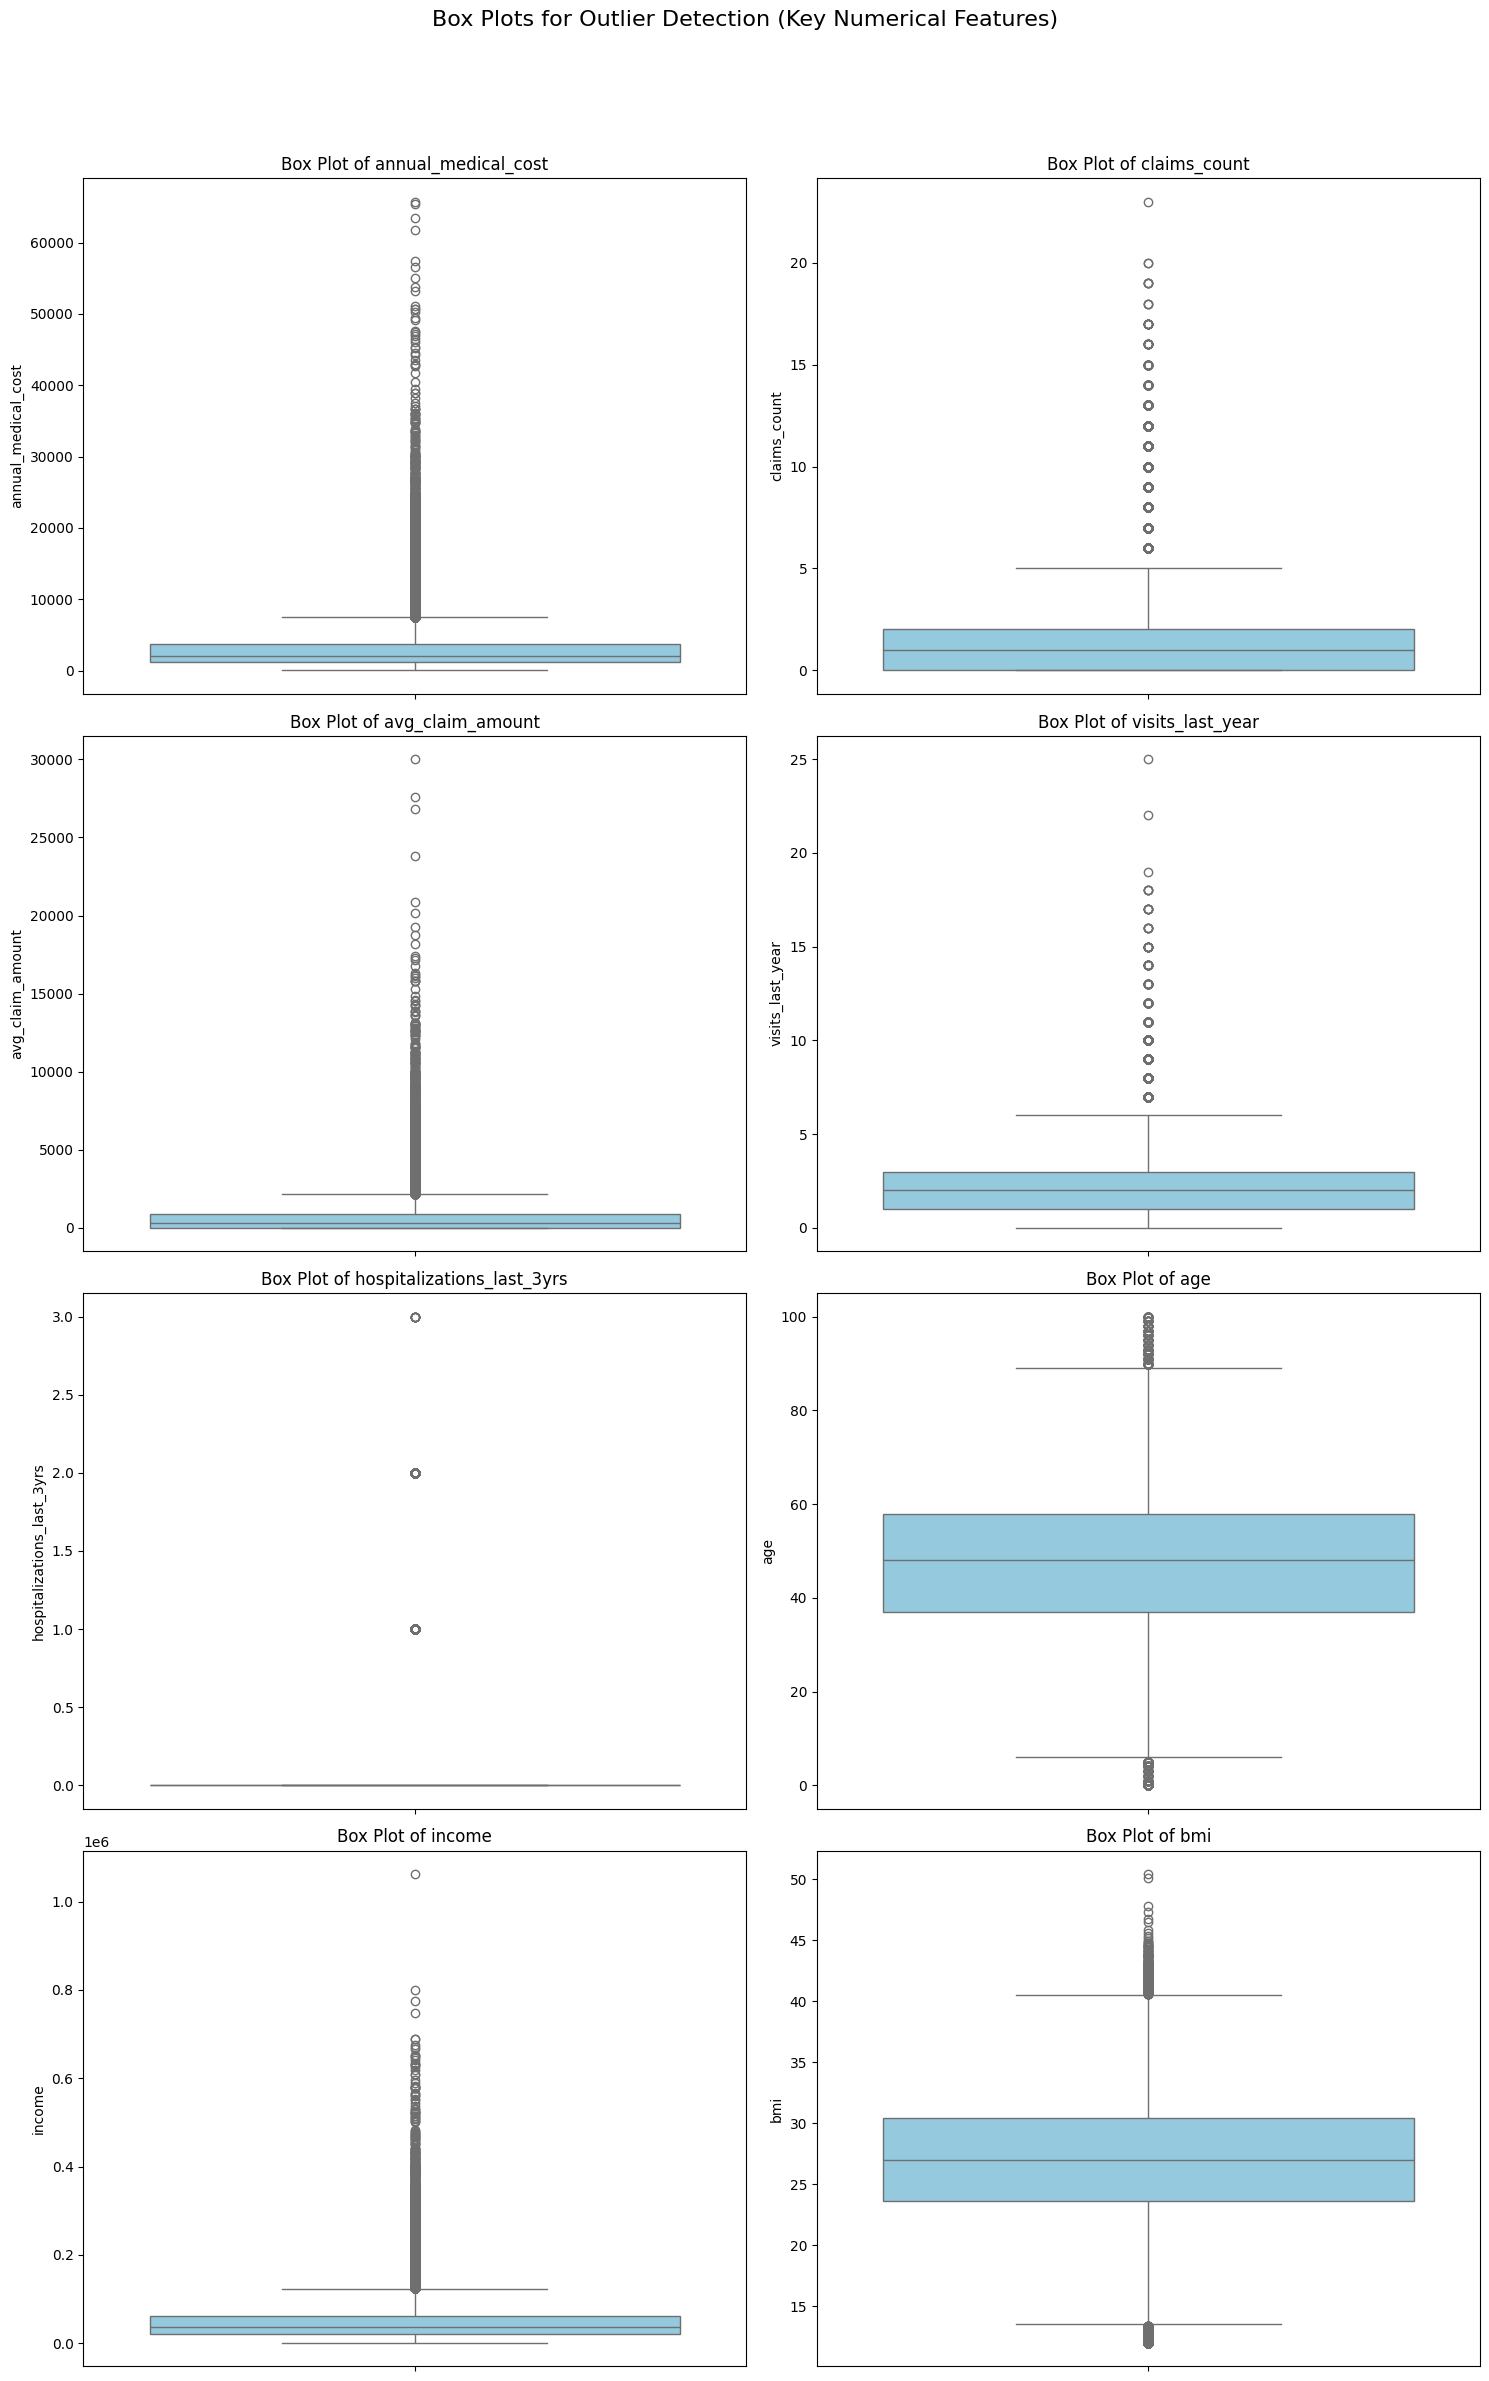

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# List of key numerical columns to visualize
numerical_cols = [
    'annual_medical_cost', 'claims_count', 'avg_claim_amount',
    'visits_last_year', 'hospitalizations_last_3yrs',
    'age', 'income', 'bmi'
]

# Set up the plotting area (4 rows, 2 columns)
n_cols = 2
n_rows = int(np.ceil(len(numerical_cols) / n_cols))

plt.figure(figsize=(15, 6 * n_rows))
plt.suptitle('Box Plots for Outlier Detection (Key Numerical Features)', fontsize=16, y=1.02)

for i, col in enumerate(numerical_cols):
    # Check if the column exists and is numeric
    if col in df.columns and pd.api.types.is_numeric_dtype(df[col]):
        plt.subplot(n_rows, n_cols, i + 1)
        sns.boxplot(y=df[col], color='skyblue')
        plt.title(f'Box Plot of {col}', fontsize=12)
        plt.ylabel(col)
    else:
        # Handle cases where the column is missing or not numerical
        plt.subplot(n_rows, n_cols, i + 1)
        plt.text(0.5, 0.5, f"Data for {col} not available",
                 horizontalalignment='center', verticalalignment='center')
        plt.axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.98]) # Adjust layout to prevent overlap
plt.savefig('outlier_box_plots.png')
print("Box plots saved as 'outlier_box_plots.png'")

Histograms saved as 'univariate_histograms.png'


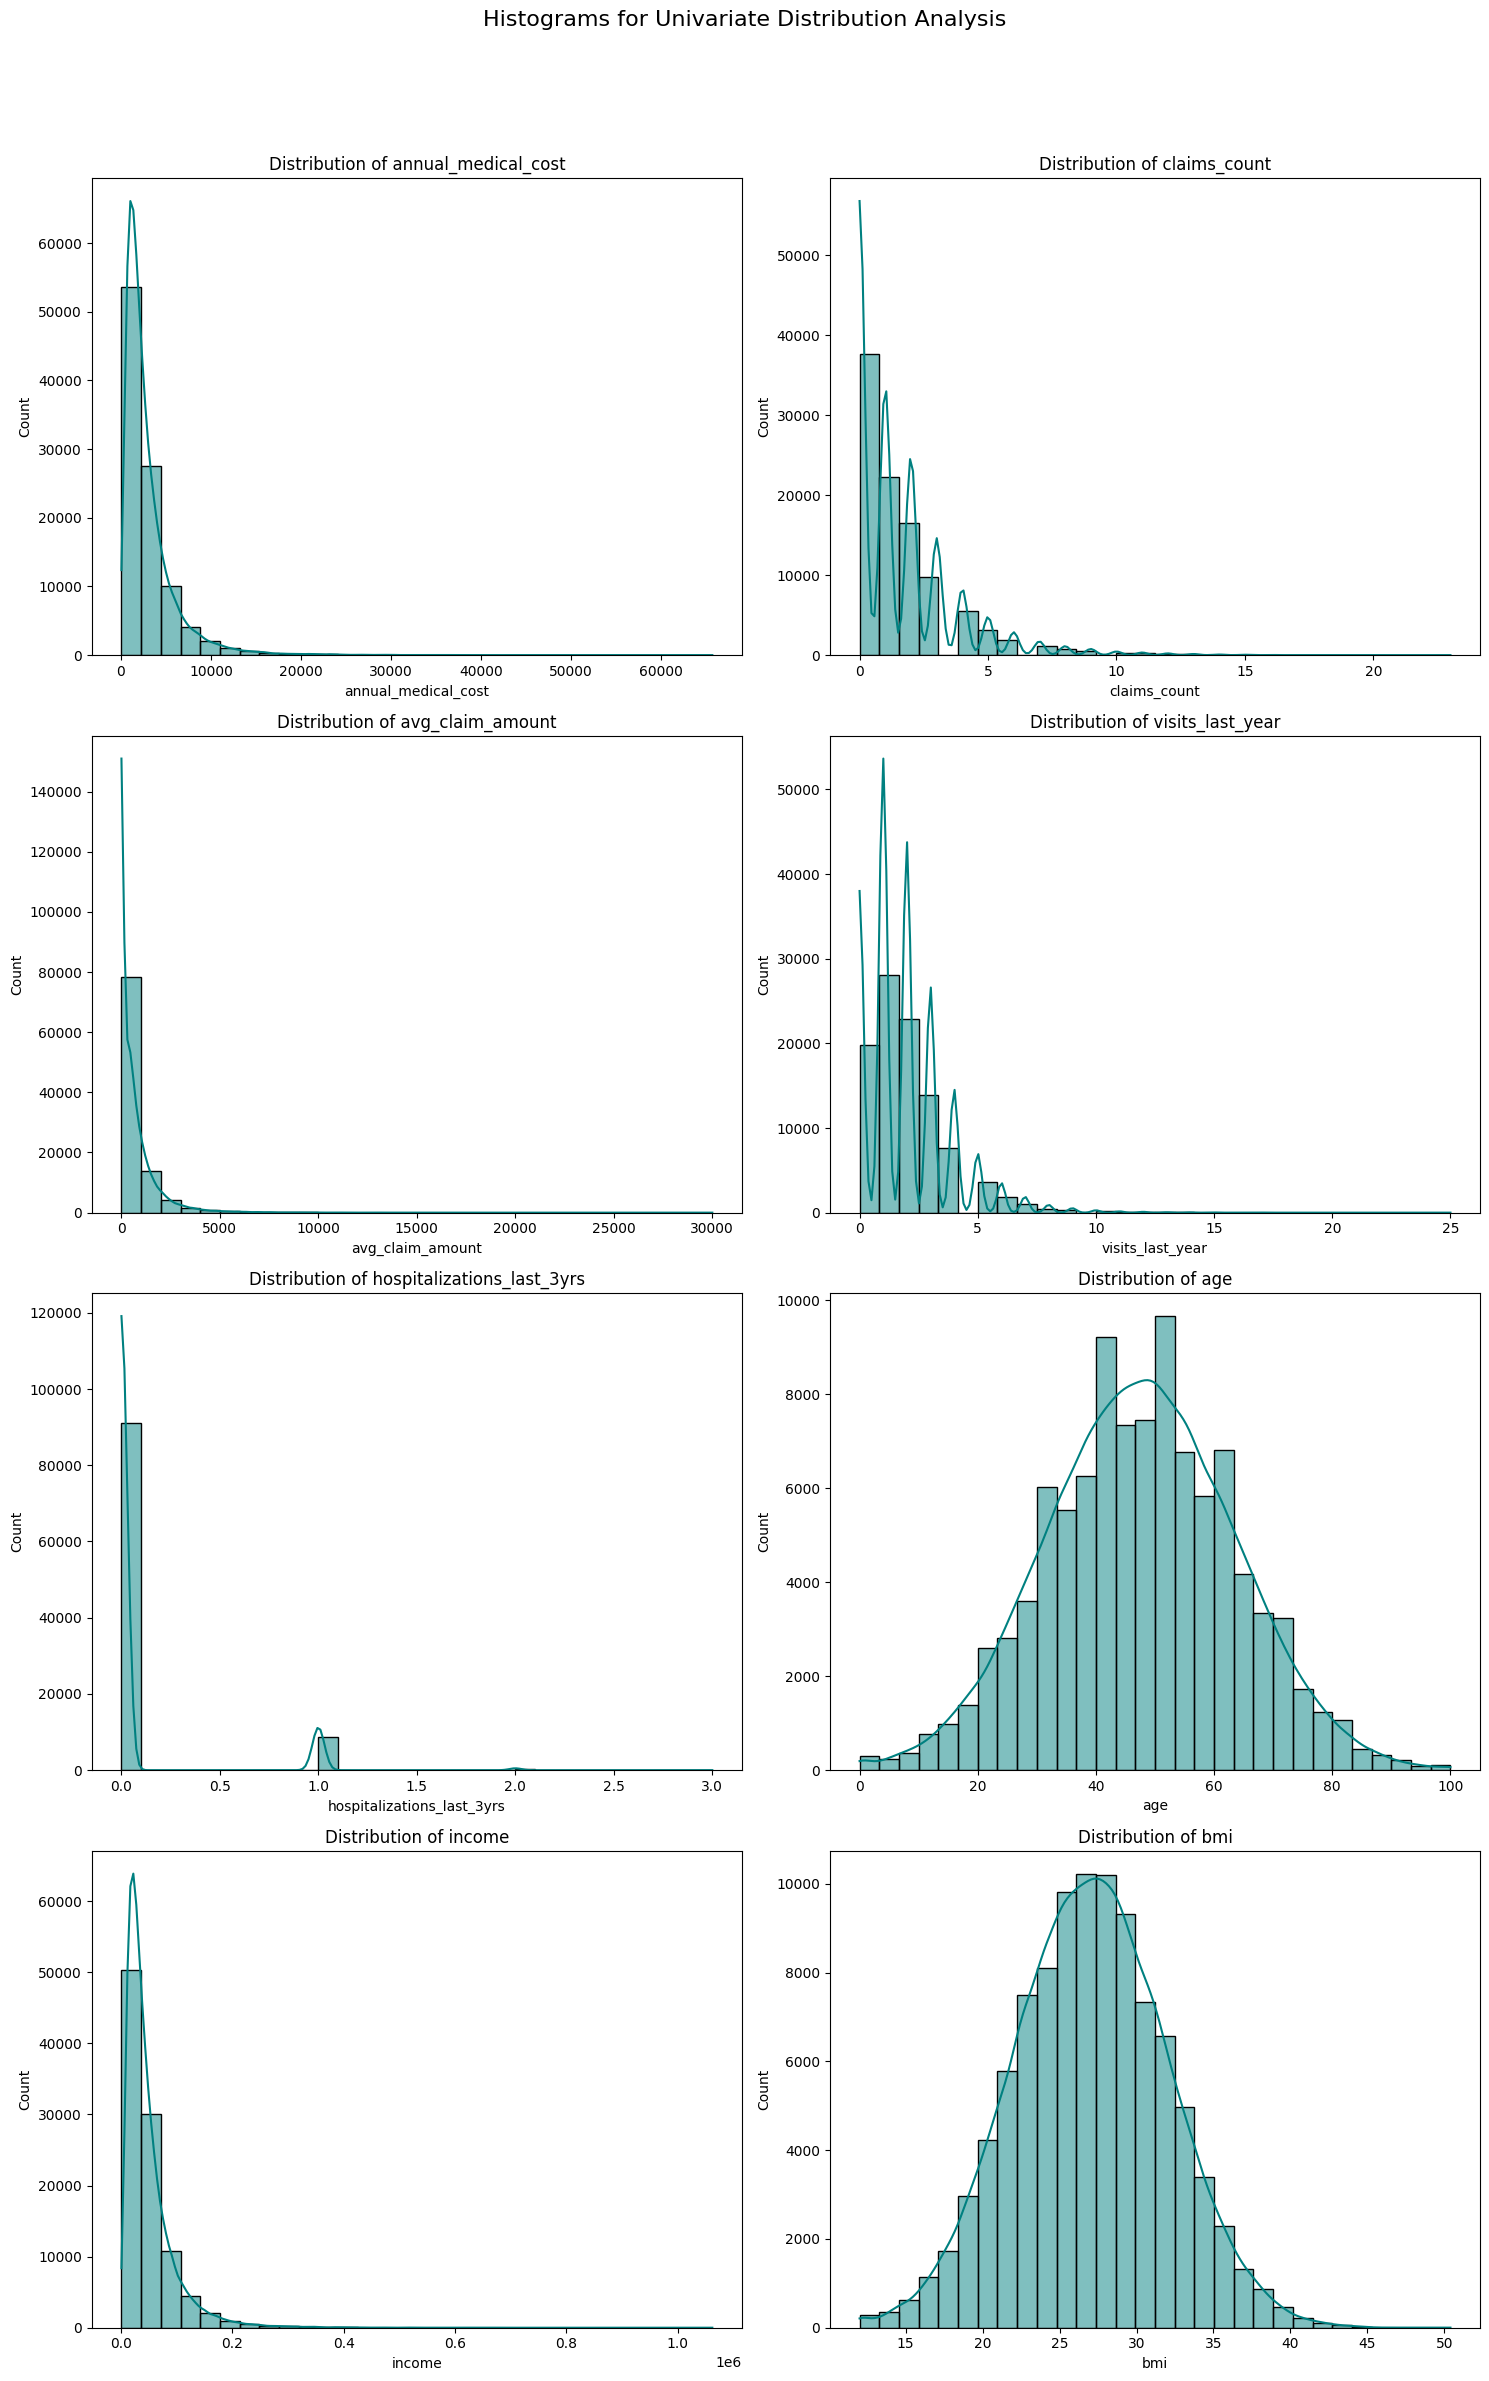

In [13]:
# Create a separate list for distributions, including the target variable
distribution_cols = [
    'annual_medical_cost', 'claims_count', 'avg_claim_amount',
    'visits_last_year', 'hospitalizations_last_3yrs',
    'age', 'income', 'bmi'
]

# Set up the plotting area (4 rows, 2 columns)
n_cols = 2
n_rows = int(np.ceil(len(distribution_cols) / n_cols))

plt.figure(figsize=(15, 6 * n_rows))
plt.suptitle('Histograms for Univariate Distribution Analysis', fontsize=16, y=1.02)

for i, col in enumerate(distribution_cols):
    if col in df.columns and pd.api.types.is_numeric_dtype(df[col]):
        plt.subplot(n_rows, n_cols, i + 1)
        # Use a robust number of bins (e.g., 30) for better detail
        sns.histplot(df[col], kde=True, bins=30, color='teal')
        plt.title(f'Distribution of {col}', fontsize=12)
        plt.xlabel(col)

plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.savefig('univariate_histograms.png')
print("Histograms saved as 'univariate_histograms.png'")

/tmp/ipython-input-2949321861.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette='Spectral')
/tmp/ipython-input-2949321861.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette='Spectral')
/tmp/ipython-input-2949321861.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette='Spectral')
/tmp/ipython-input-2949321861.py:22: FutureWarning: 

Passing `palette` without assigning `

Bar plots saved as 'categorical_bar_plots.png'


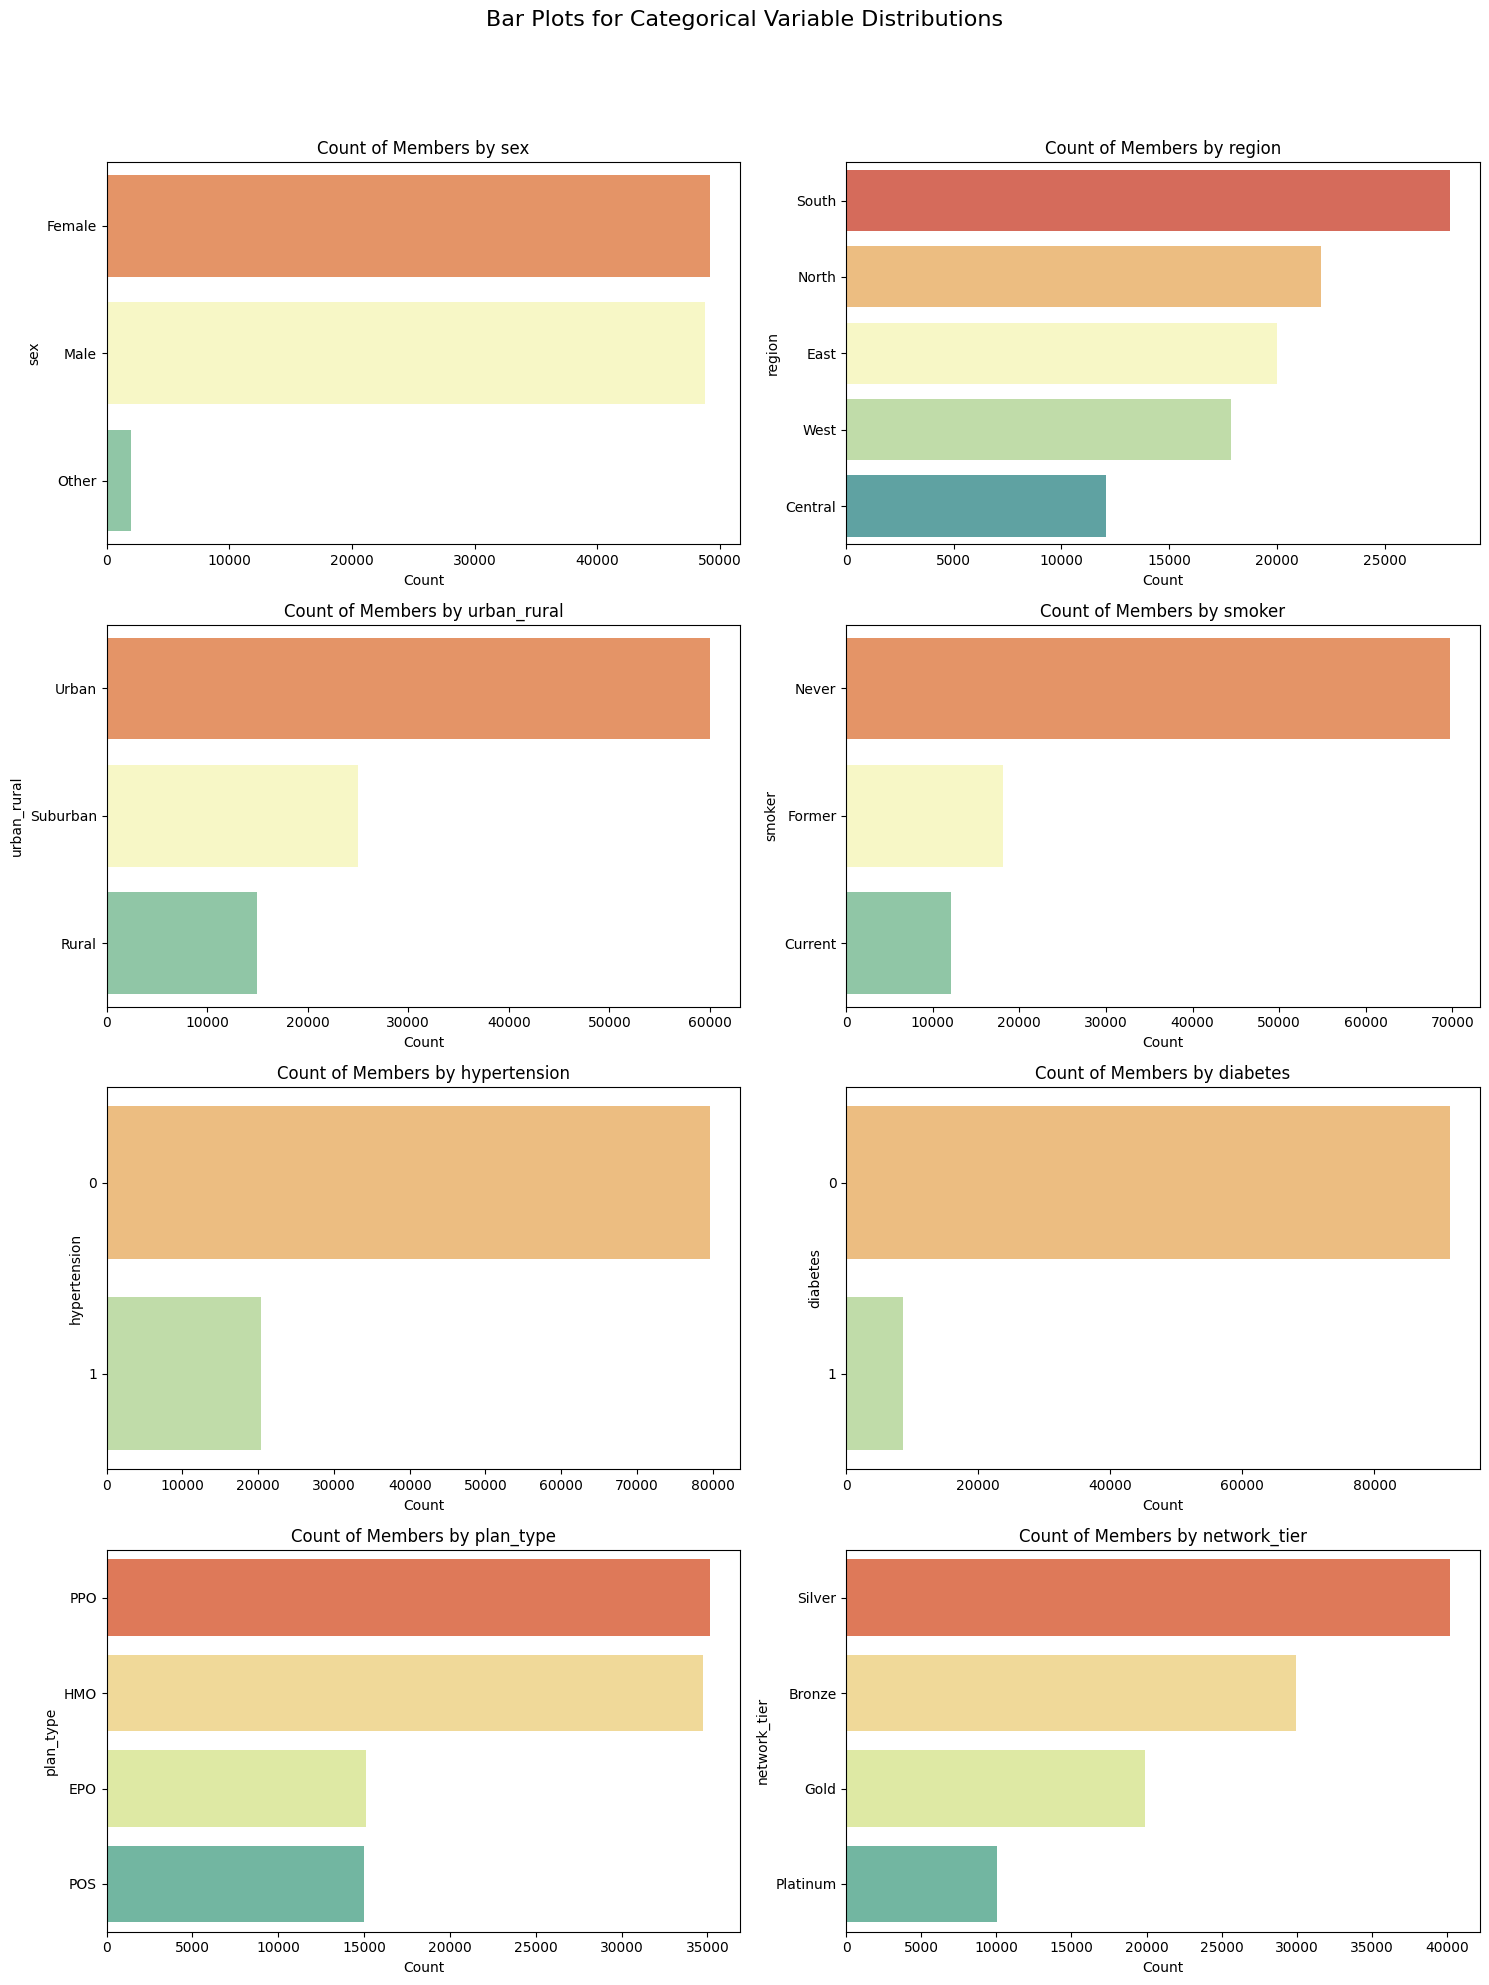

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Select key categorical and binary features from the proposal
categorical_cols = [
    'sex', 'region', 'urban_rural', 'smoker',
    'hypertension', 'diabetes', 'plan_type', 'network_tier'
]

# Set up the plotting area
n_cols = 2
n_rows = int(np.ceil(len(categorical_cols) / n_cols))

plt.figure(figsize=(15, 5 * n_rows))
plt.suptitle('Bar Plots for Categorical Variable Distributions', fontsize=16, y=1.02)

for i, col in enumerate(categorical_cols):
    if col in df.columns:
        plt.subplot(n_rows, n_cols, i + 1)
        # Use countplot to show the frequency of each category
        sns.countplot(y=df[col], order=df[col].value_counts().index, palette='Spectral')
        plt.title(f'Count of Members by {col}', fontsize=12)
        plt.xlabel('Count')
        plt.ylabel(col)
    else:
        plt.subplot(n_rows, n_cols, i + 1)
        plt.text(0.5, 0.5, f"Data for {col} not available",
                 horizontalalignment='center', verticalalignment='center')
        plt.axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.savefig('categorical_bar_plots.png')
print("Bar plots saved as 'categorical_bar_plots.png'")

Pre-Modeling Data Finalization

Model 3 - Claims Volume Prediction (Poisson Regression)

In [22]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Re-split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Re-fit the Poisson model
X_train_const = sm.add_constant(X_train, prepend=False)

print("Re-training Poisson Regression Model...")
try:
    # Use the fit_regularized method for better convergence, although simple fit often works too.
    poisson_model = sm.GLM(y_train, X_train_const, family=sm.families.Poisson()).fit(
        method='newton', maxiter=100
    )
    print("Model training complete.")

    # Display the summary of the training results
    print("\n--- Poisson Regression Model Summary ---")
    # Write the summary to a string to ensure it's captured in the output
    poisson_summary_text = poisson_model.summary().as_text()
    print(poisson_summary_text)

except Exception as e:
    print(f"A new error occurred during model fitting: {e}")

Re-training Poisson Regression Model...
A new error occurred during model fitting: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).


Features selected for correlation matrix:
- annual_premium
- annual_medical_cost
- days_hospitalized_last_3yrs
- hospitalizations_last_3yrs
- dependents
- household_size
- is_high_risk
- risk_score
- proc_surgery_count
- had_major_procedure
- age
- chronic_count
- avg_claim_amount


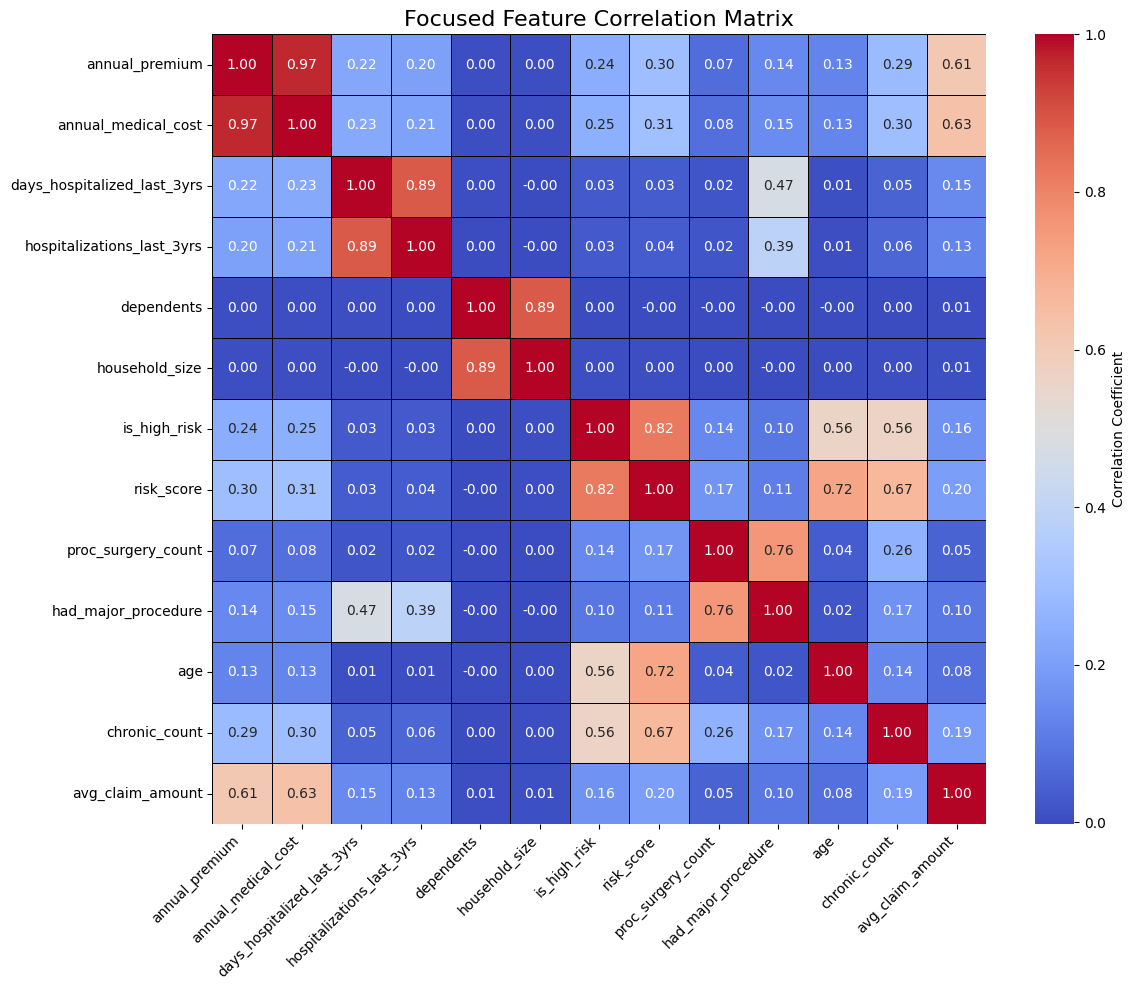

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure df is available. If not, load it:
if 'df' not in locals():
    try:
        df = pd.read_csv('cleaned_medical_insurance.csv')
        print("DataFrame 'df' loaded for correlation analysis.")
    except FileNotFoundError:
        print("Error: 'cleaned_medical_insurance.csv' not found. Please ensure the file is uploaded.")
        exit() # Stop execution if df is not loaded

# Use the user-provided list of features for correlation
correlation_features = [
    'annual_premium',
    'annual_medical_cost',
    'days_hospitalized_last_3yrs',
    'hospitalizations_last_3yrs',
    'dependents',
    'household_size',
    'is_high_risk',
    'risk_score',
    'proc_surgery_count',
    'had_major_procedure',
    'age',
    'chronic_count',
    'avg_claim_amount'
]

# Filter for features that are actually in the DataFrame and are numeric
present_numerical_features = [
    col for col in correlation_features
    if col in df.columns and pd.api.types.is_numeric_dtype(df[col])
]

if not present_numerical_features:
    print("No numerical features found for correlation matrix after filtering. Please check the feature list and DataFrame.")
else:
    print("Features selected for correlation matrix:")
    for f in present_numerical_features:
        print(f"- {f}")

    # --- 3. Correlation Matrix ---
    correlation_matrix = (
        df[present_numerical_features]
        .corr(method="pearson")
    )

    # --- 4. Visualization ---
    plt.figure(figsize=(12, 10))
    sns.heatmap(
        correlation_matrix,
        annot=True,
        fmt=".2f",
        cmap="coolwarm",
        linewidths=0.5,
        linecolor="black",
        cbar_kws={"label": "Correlation Coefficient"}
    )

    plt.title("Focused Feature Correlation Matrix", fontsize=16)
    plt.xticks(rotation=45, ha="right")
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()